In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader, Subset


from torch.optim.lr_scheduler import ReduceLROnPlateau

from sklearn.model_selection import train_test_split, KFold
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Datasets and study/Дата для домашки 5 по CV/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Datasets and study/Дата для домашки 5 по CV/test.csv")


In [ ]:
labels = train_data['target']
features = train_data.drop(columns = ["target"])
X_train, X_test, y_train, y_test = train_test_split(features,labels, train_size=0.90, random_state=42, shuffle=True, stratify=labels)
input_size = features.shape[1]

In [ ]:
train_data.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


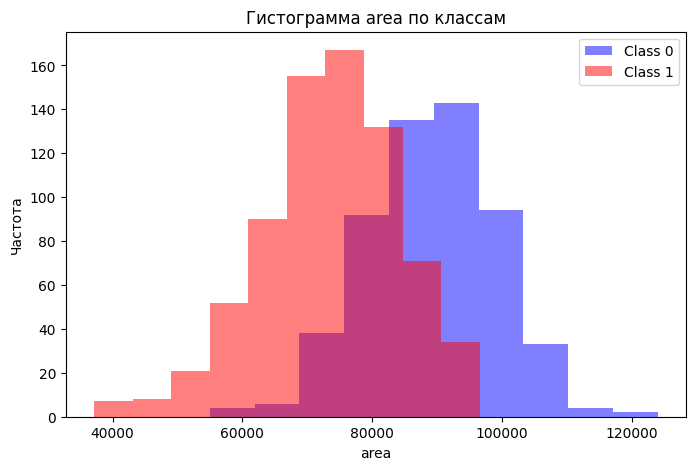

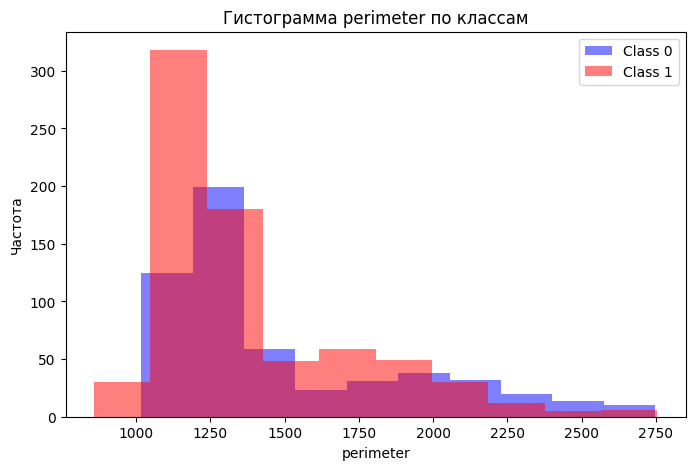

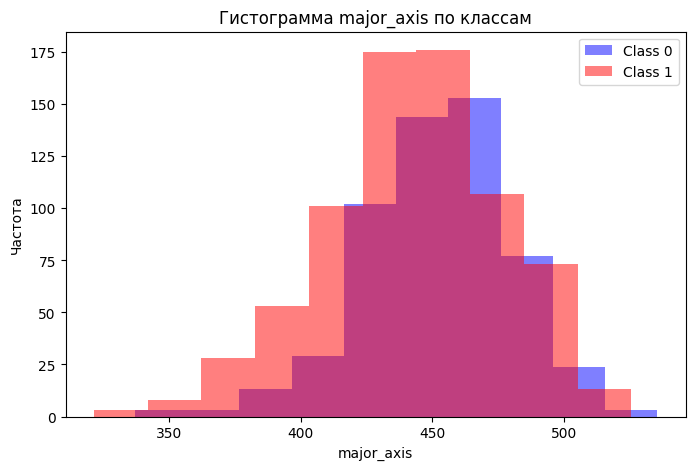

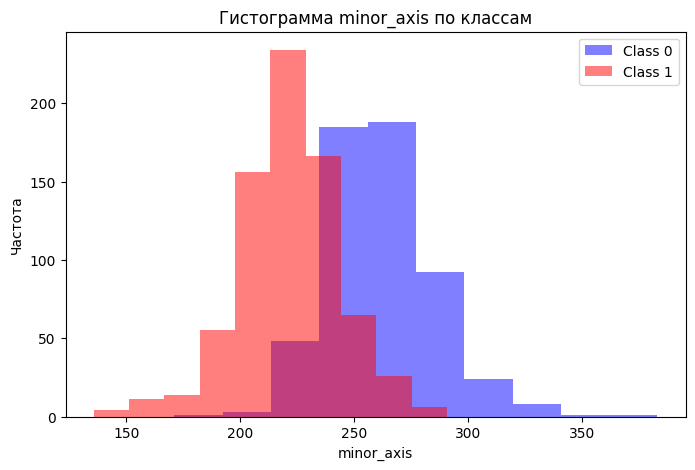

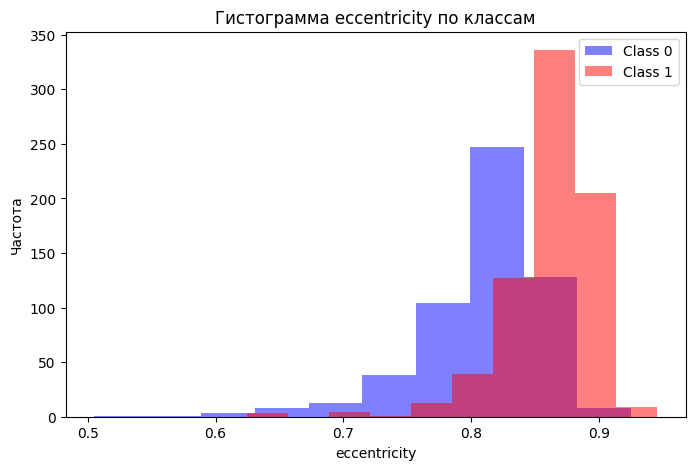

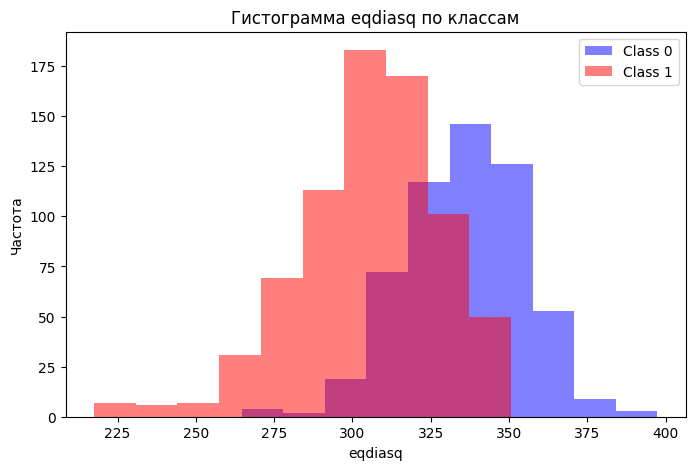

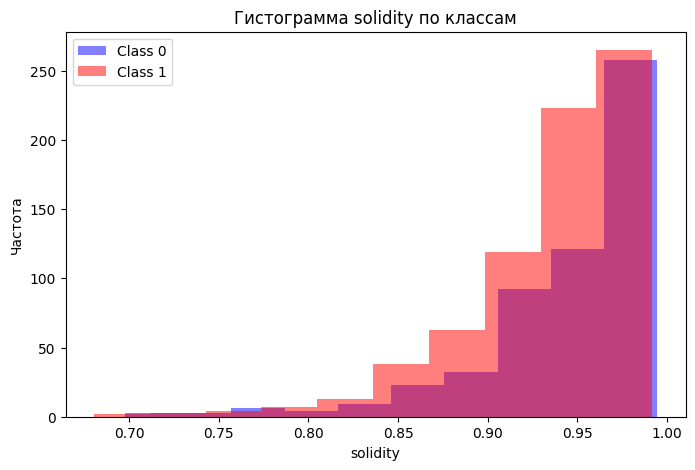

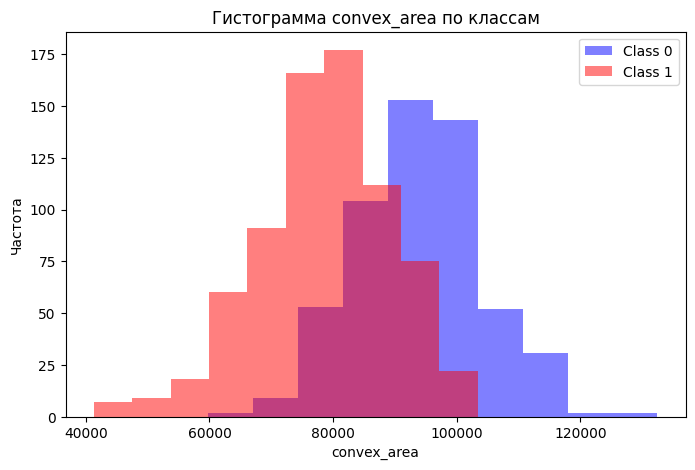

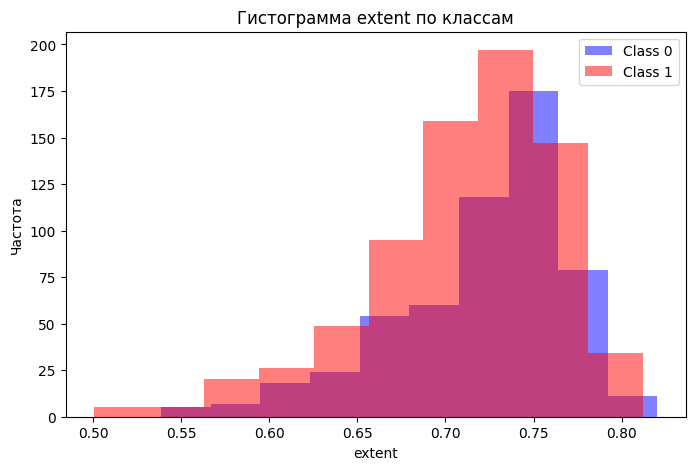

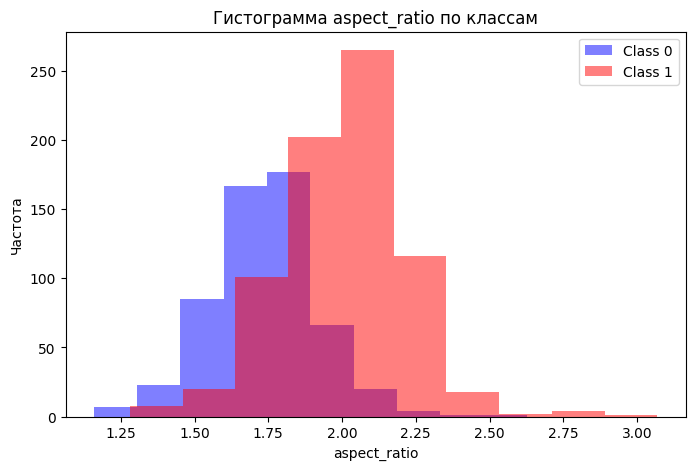

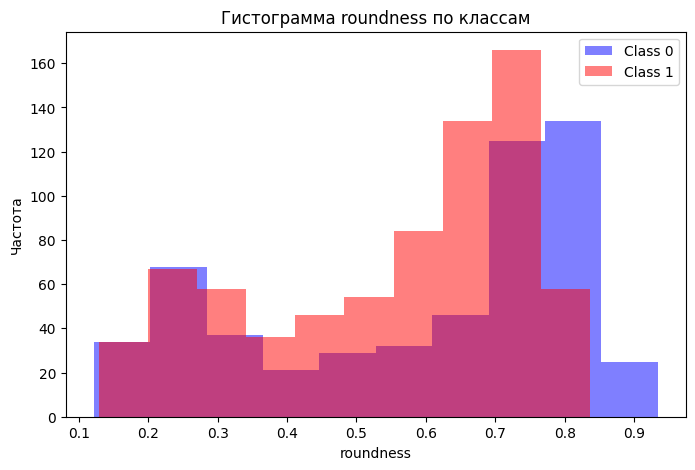

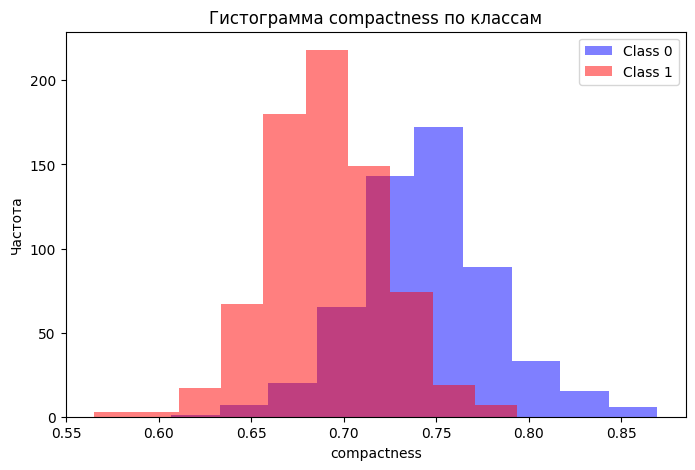

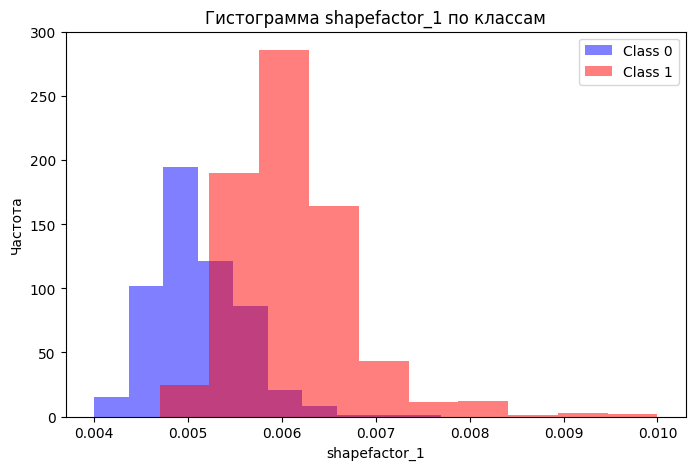

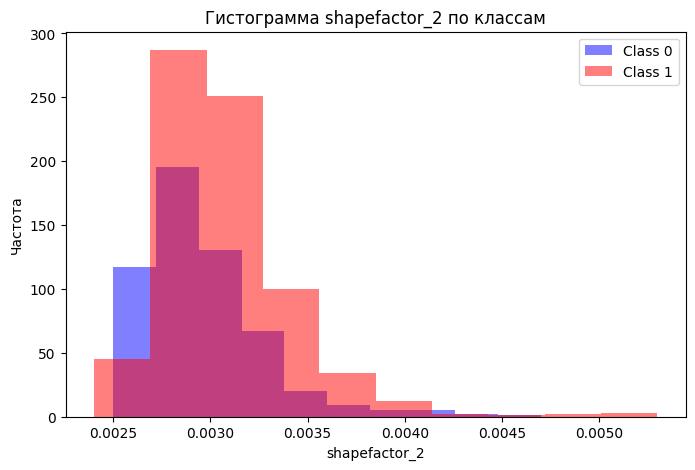

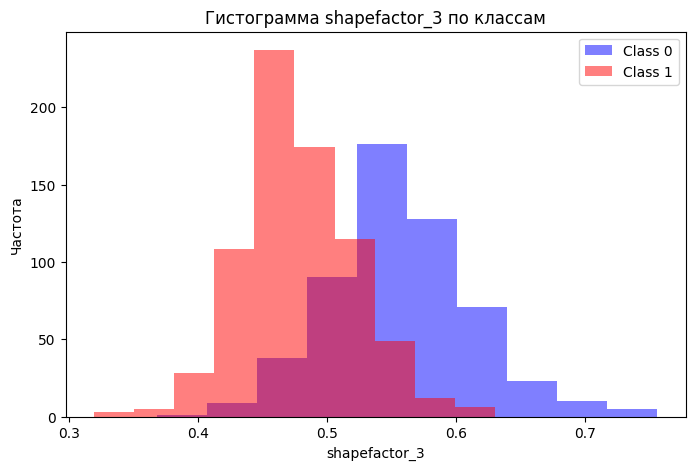

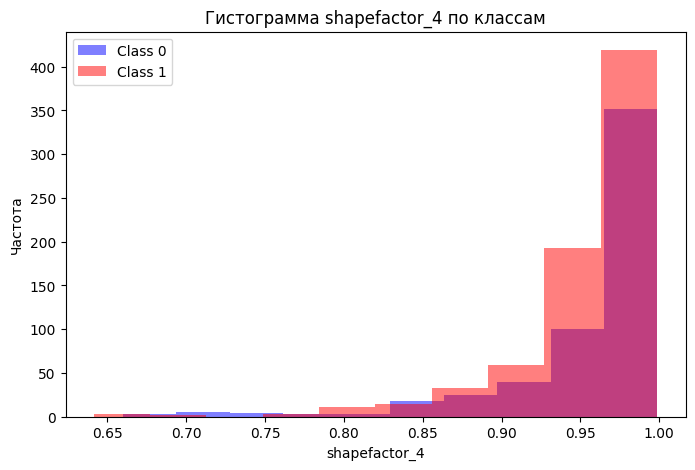

In [ ]:
for column in train_data.columns:
    if column == "target":
      break
    plt.figure(figsize=(8, 5))

    # Выбираем данные для каждого класса
    class_0 = train_data[ train_data["target"] == 0][column]
    class_1 = train_data[ train_data["target"] == 1][column]

    # Строим две гистограммы
    plt.hist(class_0, alpha=0.5, label='Class 0',  color='blue')
    plt.hist(class_1, alpha=0.5, label='Class 1',  color='red')

    # Настройки графика
    plt.title(f'Гистограмма {column} по классам')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.legend()

    plt.show()

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool


In [ ]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)


In [ ]:
model = CatBoostClassifier(
    iterations=1000,       # Количество деревьев
    learning_rate=0.03,    # Скорость обучения
    depth=6,               # Глубина деревьев
     # Категориальные признаки
    eval_metric="Accuracy",     # Метрика для валидации
    verbose=100,           # Вывод лога каждые 100 итераций
    early_stopping_rounds=300   # Остановка, если метрика не улучшается
)

model.fit(
    train_pool,
    eval_set=test_pool,
    plot=True              # Интерактивный график обучения
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8593615	test: 0.8217054	best: 0.8217054 (0)	total: 52.5ms	remaining: 52.4s
100:	learn: 0.9050906	test: 0.8992248	best: 0.9069767 (52)	total: 505ms	remaining: 4.5s
200:	learn: 0.9309750	test: 0.9069767	best: 0.9069767 (52)	total: 931ms	remaining: 3.7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9069767442
bestIteration = 52

Shrink model to first 53 iterations.


In [ ]:
# Предсказание классов
preds = model.predict(X_test)

# Оценка качества
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9069767441860465


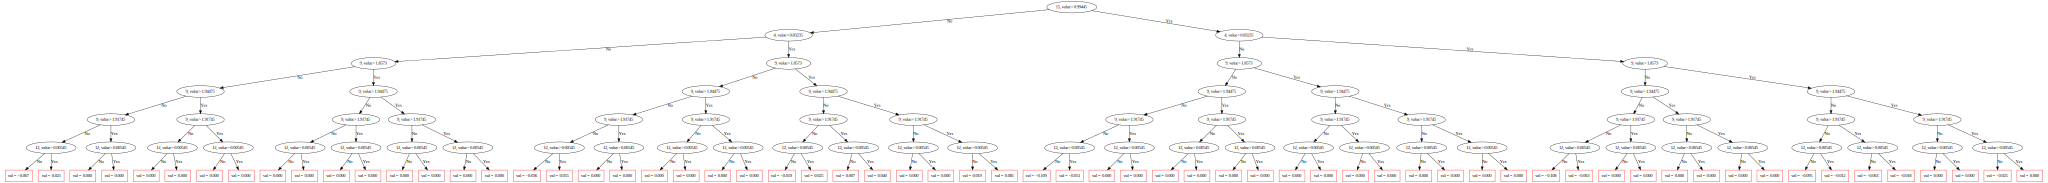

In [ ]:


# Деревья (требуется graphviz)
model.plot_tree(tree_idx=0)

In [ ]:
predictions = model.predict( test_data  )
# 7. Сохраняем в CSV
pd.DataFrame(predictions).to_csv('answers.csv', header=False, index=False, encoding='utf-8')
saved_data = pd.read_csv('/content/answers.csv', header=None, encoding='utf-8')
print(len(saved_data))

430
